In [3]:
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

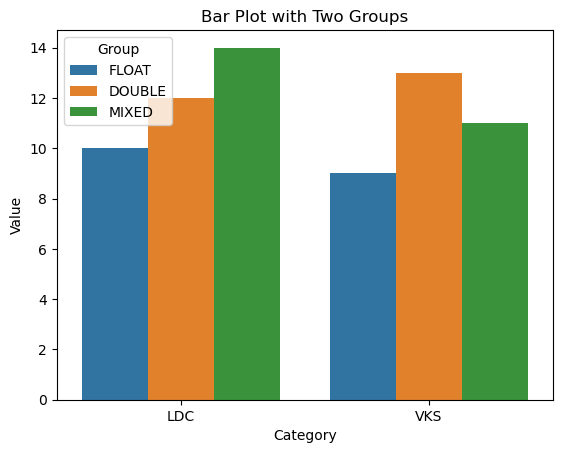

In [7]:
data = {
    'Category': ['LDC', 'LDC', 'LDC', 'VKS', 'VKS', 'VKS'],
    'Value': [10, 12, 14, 13, 9, 11],
    'Group': ['FLOAT', 'DOUBLE', 'MIXED', 'DOUBLE', 'FLOAT', 'MIXED'],
    'Type' : ['Type1', 'Type2', 'Type1', 'Type2', 'Type1', 'Type2']
}

df = pd.DataFrame(data)

# Create the bar plot
sns.barplot(x='Category', y='Value', hue='Group', data=df)

# Customize the plot
plt.title('Bar Plot with Two Groups')
plt.xlabel('Category')
plt.ylabel('Value')

# Display the plot
plt.show()

/tmp/ipykernel_306018/3640156313.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows.sort_values(by="mlups", inplace=True)
/tmp/ipykernel_306018/3640156313.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sycl_csv.drop(rows.index[0:-1], inplace=True)
/tmp/ipykernel_306018/3640156313.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sycl_csv["parallelism"] = sycl_csv[

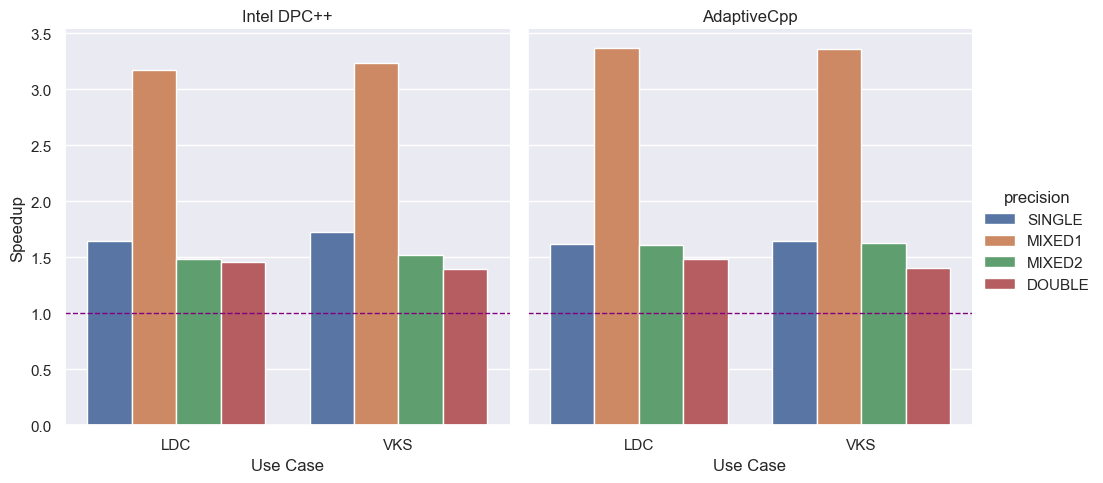

In [180]:
# data = {
#     'Category': ['LDC', 'LDC', 'LDC', 'VKS', 'VKS', 'VKS', 'LDC', 'LDC', 'LDC', 'VKS', 'VKS', 'VKS'],
#     'Value': [10, 12, 14, 13, 9, 11, 10, 12, 14, 13, 9, 11],
#     'Group': ['FLOAT', 'DOUBLE', 'MIXED', 'DOUBLE', 'FLOAT', 'MIXED', 'FLOAT', 'DOUBLE', 'MIXED', 'DOUBLE', 'FLOAT', 'MIXED'],
#     'Type' : ['Type1', 'Type1', 'Type1', 'Type1', 'Type1', 'Type1', 'Type2', 'Type2', 'Type2', 'Type2', 'Type2', 'Type2']
# }

# Preprocess data
sns.set_theme()
res = pd.read_csv("results.csv")
#find best fortran implementation for each hw
hw = ["NVIDIA", "AMD", "INTEL"]
precision = ["SINGLE", "DOUBLE", "MIXED1", "MIXED2"]
use_case = ["LDC", "VKS"]
compilers = ["AdaptiveCpp", "dpcpp"]
best_impl = dict()
for u in use_case:
    best_impl[u] = dict()
    for h in hw:
        best_impl[u][h] = dict()
        for p in precision:
            filtered_df = res[((res["hw"] == h) & (res["usecase"] == u) & (res["impl"] == "fortran") & (res["precision"] == p))].sort_values(by="mlups").reset_index(drop=True)
            if not filtered_df.empty:
                first_mlups_value = filtered_df["mlups"].iloc[0]
                # Optionally, store the value in best_impl dictionary
                best_impl[u][h][p] = first_mlups_value
            else:
                best_impl[u][h][p] = None
# Get sycl values
sycl_csv = res[(res["impl"] == "sycl")]
# Divide sycl values by best fortran values
for u in use_case:
    for h in hw:
        for p in precision:
            rows = sycl_csv.loc[(sycl_csv["hw"] == h) & (sycl_csv["usecase"] == u) & (sycl_csv["precision"] == p)]
            if not rows.empty:
                sycl_csv.loc[(sycl_csv["hw"] == h) & (sycl_csv["usecase"] == u) & (sycl_csv["precision"] == p), "mlups"] = sycl_csv.loc[(sycl_csv["hw"] == h) & (sycl_csv["usecase"] == u) & (sycl_csv["precision"] == p), "mlups"].map(lambda x: x / best_impl[u][h][p]) 
# # Create the bar plot using catplot

for u in use_case:
    for h in hw:
        for p in precision:
            for c in compilers:
                rows = sycl_csv.loc[(sycl_csv["hw"] == h) & (sycl_csv["usecase"] == u) & (sycl_csv["precision"] == p) & (sycl_csv["parallelism"] == c)]
                if not rows.empty:
                    # Drop all rows except the the one with the hightest mlups
                    rows.sort_values(by="mlups", inplace=True)
                    sycl_csv.drop(rows.index[0:-1], inplace=True)
                    
#subsitute each "dpcpp" entry in column "compilers" to "Intel DPC++"
sycl_csv["parallelism"] = sycl_csv["parallelism"].str.replace("dpcpp", "Intel DPC++")

g = sns.catplot(x='usecase', y='mlups', hue='precision', data=sycl_csv, kind='bar', col='parallelism')

# plot a horizontal line at y=1
for ax in g.axes.flat:
    ax.axhline(1, color='purple', linewidth=1, linestyle='--')
    
g.set_axis_labels('Use Case', 'Speedup') # Set x and y axis labels
g.set_titles('{col_name}') # Set title for each subplot

# # Customize the plot
# g.fig.suptitle('Bar Plot with Two Groups by Type', y=1.03) # Adjust title and its position
# g.set_axis_labels('Category', 'Value') # Set x and y axis labels

# # Display the plot
# plt.show()

/tmp/ipykernel_306018/1909039387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sycl_csv["alloc_type_range"] = sycl_csv["alloc_type"] + " / " + sycl_csv["range"]
/tmp/ipykernel_306018/1909039387.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["speedup"] = subset["mlups"] / value["mlups"].iloc[0]


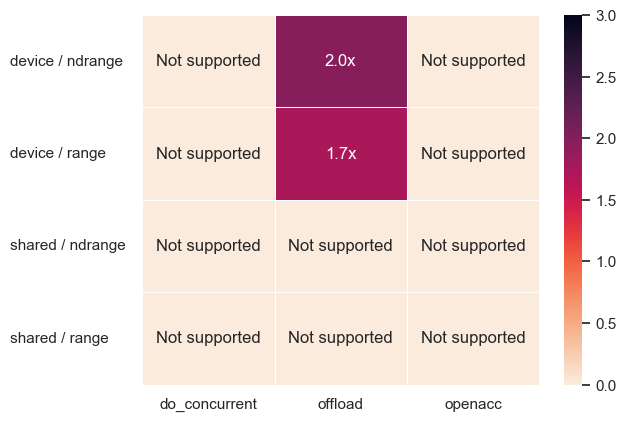

In [181]:
sycl_csv = res[(res["impl"] == "sycl")] # Reset csv
# add new coloumn to sycl_csv eith the combination of values in columns "alloc_type" and "range"
sycl_csv["alloc_type_range"] = sycl_csv["alloc_type"] + " / " + sycl_csv["range"]
fortran_par_types = ["do_concurrent", "openacc", "offload"]         

# duplcate each row three times and add the values in fortran_par_types to the new column "fortran_par"
sycl_csv = sycl_csv.loc[sycl_csv.index.repeat(3)].reset_index(drop=True)
sycl_csv["fortran_par"] = fortran_par_types * int(len(sycl_csv) / 3)
sycl_csv["speedup"] = 0

for h in hw:
    for p in precision:
        for u in use_case:
            for fortran_par in fortran_par_types:
#                 # print(f"hw: {h}, precision: {p}, usecase: {u}, fortran_par: {fortran_par}")
                value = res[(res["impl"] == "fortran") & (res["parallelism"] == fortran_par) & (res["hw"] == h) & (res["usecase"] == u) & (res["precision"] == p)].reset_index(drop=True)
                if not value.empty:
                    # value["mlups"].iloc[0]
                    subset = sycl_csv.loc[(sycl_csv["hw"] == h) & (sycl_csv["usecase"] == u) & (sycl_csv["precision"] == p) & (sycl_csv["fortran_par"] == fortran_par)]
                    subset["speedup"] = subset["mlups"] / value["mlups"].iloc[0]
                    sycl_csv.update(subset)

# print(sycl_csv)
# sycl_csv.to_csv("sycl.csv", index=False)

# # make seaborn heatmap
# sycl_csv = sycl_csv.pivot(index="alloc_type_range",columns="fortran_par",values="speedup")
agg_sycl_csv = sycl_csv.groupby(['alloc_type_range', 'fortran_par'])['speedup'].mean().reset_index()

# Pivot the aggregated DataFrame
pivot_sycl_csv = agg_sycl_csv.pivot(index='alloc_type_range', columns='fortran_par', values='speedup')

# Plot the heatmap
ax = sns.heatmap(data=pivot_sycl_csv, vmax=3, annot=True,fmt=".1f",cmap="rocket_r", linewidth=0.5)
_xlabels = ax.get_xticklabels()
for labels in _xlabels:
    labels.set(text=labels.get_text().replace(' ',"\n"))
ax.set_xticklabels(_xlabels, rotation=-360, ha='center', rotation_mode='anchor')
ax.set_yticklabels(ax.get_yticklabels(), ha='left', x=-0.3, rotation=0)
ax.set(xlabel='',ylabel='')
# set the annotated values to be in the center of the cells
for t in ax.texts:
    if t.get_text() == "0.0":
        t.set_text("Not supported")
    else:
        t.set_text(t.get_text() + "x")

# ax = sns.heatmap(data = sycl_csv)


# for fortran_par in fortran_par_types:
#     value = res[(res["impl"] == "fortran") & (res["parallelism"] == fortran_par)]
#     sycl_csv[fortran_par] = sycl_csv["mlups"] / 
